## Задание

Создайте автокодировщик, удаляющий черные квадраты в лучшайных областях изображений.

Алгоритм действий:
1. Возьмите базу картинок Mnist.
2. На картинках в случайных местах сделайте чёрные квадраты размера 8 на 8.
3. Создайте и обучите автокодировщик восстанавливать оригинальные изображения из "зашумленных" квадратом изображений.
4. Добейтесь MSE < 0.0070 на тестовой выборке

## Импорт библиотек

In [ ]:
# Отображение
import matplotlib.pyplot as plt

# Для работы с тензорами
import numpy as np 

from tensorflow.keras import Model, utils

# Класс создания модели
from tensorflow.keras.models import Model

# Для загрузки данных
from tensorflow.keras.datasets import mnist

# Необходимые слои
from tensorflow.keras.layers import Input, Conv2DTranspose, MaxPooling2D, Conv2D, BatchNormalization, Dropout

# Оптимизатор
from tensorflow.keras.optimizers import Adam

%matplotlib inline

## Утилиты

In [ ]:
def add_square(x):
  # Доабвление квадратов на изображение
  x = x.copy()

  squareRandomX = np.random.randint(20) 
  squareRandomY = np.random.randint(20) 

  for i in range(squareRandomX,squareRandomX+8):
    for j in range(squareRandomY,squareRandomY+8):
         x[i,j] = 0
         
  return x

In [ ]:
def show_random_photo_in_array(first_list, second_list, count, mode_color):
  # Вывод случайных изображений из двух массивов 

  plt.figure(figsize=(15,10))

  for i in range(1, count):
    index = np.random.randint(0, first_list.shape[0])

    ax = plt.subplot(2, count, i)
    ax.imshow(first_list[index].squeeze(), cmap=mode_color)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, count, count + i)
    ax.imshow(second_list[index].squeeze(), cmap=mode_color)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

  plt.show()

In [ ]:
def show_result_fit(history):
  # Вывод графика результата обучение

  plt.plot(history.history['loss'], 
         label='Ошибка на обучающем наборе')
  plt.plot(history.history['val_loss'], 
         label='Ошибка на проверочном наборе')
  plt.xlabel('Эпоха обучения')
  plt.ylabel('Ошибка')
  plt.legend()  
  plt.show()

In [ ]:
def build_model(in_shape):
  # Построение модели 

  input_img = Input(in_shape)

  x = Conv2D(128, 2, padding='same', activation='relu')(input_img)
  x = BatchNormalization()(x)
  x = Conv2D(256, 2, padding='same', activation='relu')(x)
  x = MaxPooling2D()(x)
  x = Conv2D(128, 2, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)
  x = Dropout(0.3)(x)
  x = Conv2D(64, 2, padding='same', activation='relu')(x)

  z = BatchNormalization()(x)

  x = Conv2DTranspose(64, 2, strides=2, padding='same', activation='relu')(z)
  x = BatchNormalization()(x)
  x = Dropout(0.3)(x)

  x = Conv2D(128, 2, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)

  x = Conv2D(256, 2, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)

  x = Conv2D(128, 3, padding='same', activation='relu')(x)
  x = BatchNormalization()(x)

  outputs = Conv2D(1, 2, padding='same', activation='sigmoid')(x)

  model = Model(input_img, outputs)

  model.compile(optimizer=Adam(1e-4), loss='mse')

  return model

## Загрузка данных 



In [ ]:
# Загрузка данных
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Нормировка данных
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [ ]:
# Изменение формы под удобную для Keras
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

In [ ]:
x_train = X_train.copy()
x_test = X_test.copy()

In [ ]:
X_train = np.array(list(map(add_square, X_train)))
X_test = np.array(list(map(add_square, X_test)))

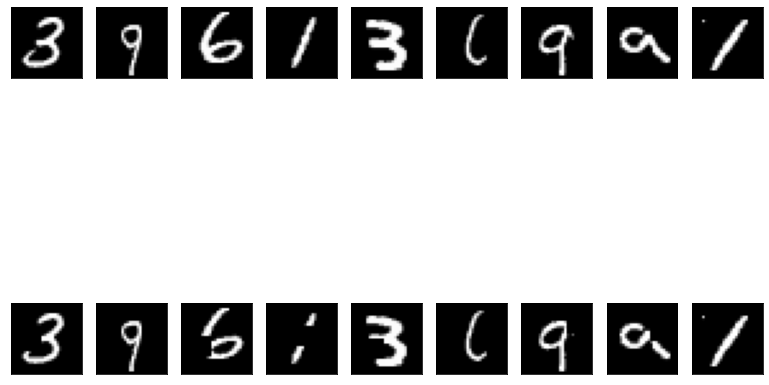

In [ ]:
show_random_photo_in_array(x_train, X_train, 10, 'gray')

## Обучение модели

In [ ]:
# Построение модели 
model = build_model(in_shape=(28,28,1))

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 128)       640       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 128)      512       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       131328    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 256)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       131200

Схема автокодировщика


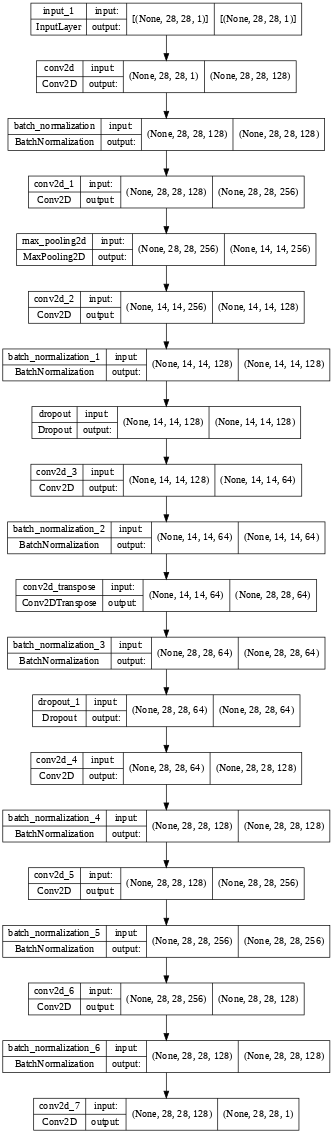

In [ ]:
print('Схема автокодировщика')
utils.plot_model(model, show_shapes=True, dpi=50)

In [ ]:
# Обучение модели
history = model.fit(X_train, x_train,
                    shuffle=True, 
                    batch_size=24, 
                    epochs=10,
                    validation_data=(X_test, x_test),
                    verbose=1)

Epoch 1/10
2500/2500 [==============================] - 83s 28ms/step - loss: 0.0177 - val_loss: 0.0094
Epoch 2/10
2500/2500 [==============================] - 72s 29ms/step - loss: 0.0094 - val_loss: 0.0083
Epoch 3/10
2500/2500 [==============================] - 73s 29ms/step - loss: 0.0082 - val_loss: 0.0073
Epoch 4/10
2500/2500 [==============================] - 73s 29ms/step - loss: 0.0077 - val_loss: 0.0068
Epoch 5/10
2500/2500 [==============================] - 75s 30ms/step - loss: 0.0073 - val_loss: 0.0066
Epoch 6/10
2500/2500 [==============================] - 73s 29ms/step - loss: 0.0071 - val_loss: 0.0064
Epoch 7/10
2500/2500 [==============================] - 73s 29ms/step - loss: 0.0069 - val_loss: 0.0063
Epoch 8/10
2500/2500 [==============================] - 72s 29ms/step - loss: 0.0068 - val_loss: 0.0062
Epoch 9/10
2500/2500 [==============================] - 73s 29ms/step - loss: 0.0066 - val_loss: 0.0061
Epoch 10/10
2500/2500 [==============================] - 72s 29m

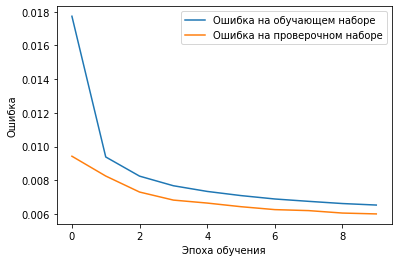

In [ ]:
show_result_fit(history)

In [ ]:
# Предсказание на тестовой выборки
pred_list = model.predict(X_test)

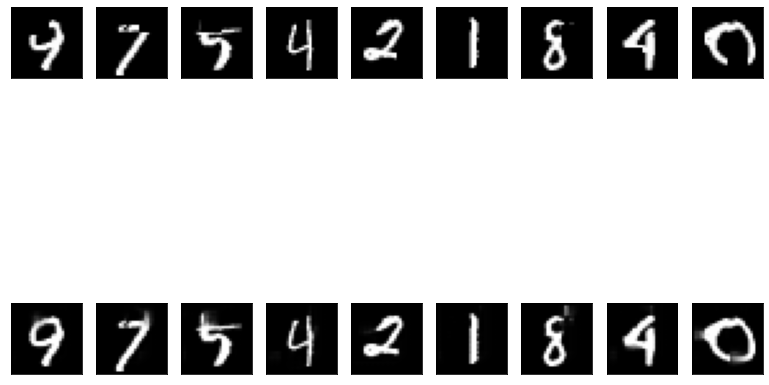

In [ ]:
show_random_photo_in_array(X_test, pred_list, 10, 'gray')